Introduction



A TED talk is a recorded public-speaking presentation that was originally given at the main TED (technology, entertainment and design) annual event or one of its many satellite events around the world.Every person who has the opportunity to speak at TED has an extraordinary history. They have either been the best in their field, or they have pioneered an emerging field, or they have done something that has made a difference in society.

For Ted Talk analysis, I will answer the following aspects from data cleansing of data sets to exploratory data analysis using data visualization.

Q. Finding the most popular TED talks

Q. Finding the most popular TED talks Speaker

Q. Judge the correlation between views and likes

Q. Find authors who speak frequently

In [65]:
## Import the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pysqldf = lambda sql : sqldf(sql,globals())
import seaborn as sns
from pandasql import sqldf

In [66]:
## Load the dataset
df = pd.read_csv("datas.csv")

In [67]:
df.head()

,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5440 entries, 0 to 5439
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5440 non-null   object
 1   author  5439 non-null   object
 2   date    5440 non-null   object
 3   views   5440 non-null   int64 
 4   likes   5440 non-null   int64 
 5   link    5440 non-null   object
dtypes: int64(2), object(4)
memory usage: 255.1+ KB


In [69]:
df.isnull().sum()

title     0
author    1
date      0
views     0
likes     0
link      0
dtype: int64

In [70]:
## Drop the null value
df= df.dropna(axis= 0, how= 'any')

In [71]:
## After removing the null value
df.isnull().sum()

title     0
author    0
date      0
views     0
likes     0
link      0
dtype: int64

Finding the most popular TED talks

In [72]:
## Finding the most popular TED Talks in terms of 'views'
df.sort_values(by = 'views', ascending = False)

,title,author,date,views,likes,link
5436,Do schools kill creativity?,Sir Ken Robinson,February 2006,72000000,2100000,https://ted.com/talks/sir_ken_robinson_do_scho...
4084,Your body language may shape who you are,Amy Cuddy,June 2012,64000000,1900000,https://ted.com/talks/amy_cuddy_your_body_lang...
2958,Inside the mind of a master procrastinator,Tim Urban,February 2016,60000000,1800000,https://ted.com/talks/tim_urban_inside_the_min...
4765,How great leaders inspire action,Simon Sinek,September 2009,57000000,1700000,https://ted.com/talks/simon_sinek_how_great_le...
4605,The power of vulnerability,Brené Brown,June 2010,56000000,1700000,https://ted.com/talks/brene_brown_the_power_of...
...,...,...,...,...,...,...
478,The case for public media,Qi Wu 吴琪,November 2020,1500,47,https://ted.com/talks/qi_wu_the_case_for_publi...
1692,"""Part II. The Journey Through Time"" / ""Ruslan ...",Deutsche Philharmonie Merck,November 2018,1300,40,https://ted.com/talks/deutsche_philharmonie_me...
1064,"""Jamie Raeburn"" / ""Baloo Baleerie"" / ""Twa recr...",Findlay Napier and Gillian Frame,July 2019,1300,40,https://ted.com/talks/findlay_napier_and_gilli...
552,Virtual Worlds,Far Flung,November 2020,1300,39,https://ted.com/talks/far_flung_virtual_worlds


Finding the most popular TED talks Speaker

In [73]:
## Finding the most popular TED Talks Speakers in terms of 'views'
df.groupby('author').sum()['views'].sort_values(ascending = False).head()

author
Alex Gendler        187196000
Sir Ken Robinson     95654000
Bill Gates           77800000
Simon Sinek          74800000
Brené Brown          72000000
Name: views, dtype: int64

Judge the correlation between views and likes

In [74]:
df_corr=df[['views','likes']].corr()
df_corr

,views,likes
views,1.000000,0.999661
likes,0.999661,1.000000


the correlation of views and likes is 0.9997, close to 1. Therefore, these two variables have very strong correlation.

Find authors who speak frequently

In [75]:
df.head()


,title,author,date,views,likes,link
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,December 2021,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,February 2022,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...
2,How play can spark new ideas for your business,Martin Reeves,September 2021,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...
3,Why is China appointing judges to combat clima...,James K. Thornton,October 2021,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,October 2021,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...


In [76]:
author_frequency=sqldf("select author, count(*) as frequency \
                         from df \
                         group by author \
                         order by frequency desc \
                         limit 10")

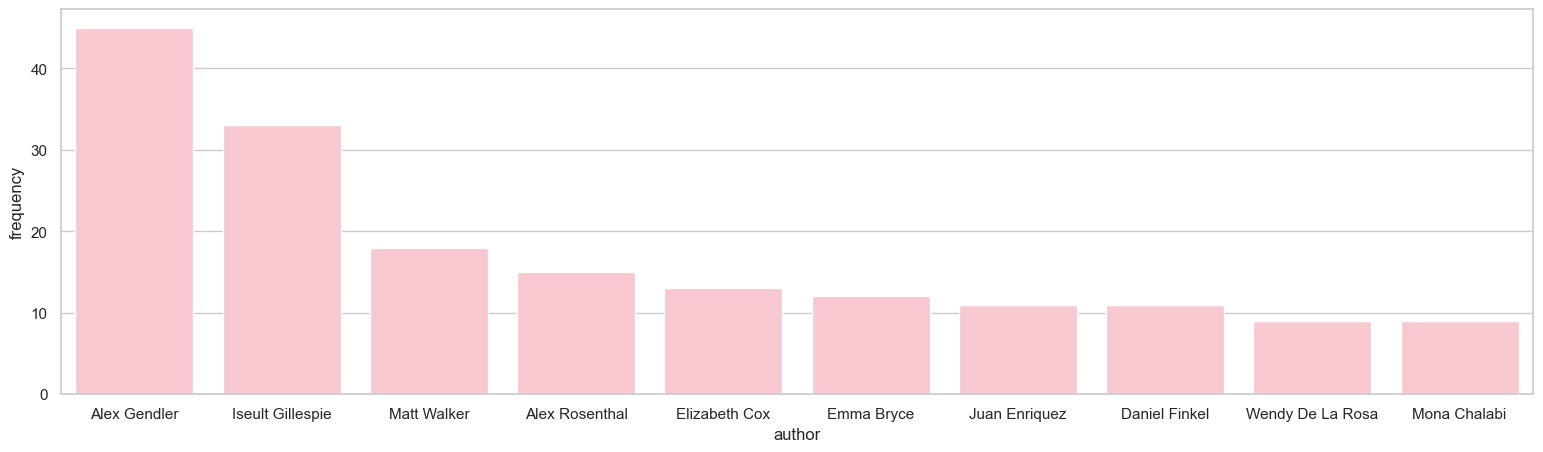

In [77]:
plt.figure(figsize=(19,5))
sns.set_theme(style="whitegrid")
g=sns.barplot(x='author',y='frequency',data=author_frequency,color="pink")


Author: Deepanshu Dagdi